<a href="https://colab.research.google.com/github/imsnto/airbnb-price-prediction/blob/main/price_prediction_of_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [470]:
import os
import shutil

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', 25)

#Exploratory Data Analysis

## Data Load

In [471]:
dataset_path = r'/content/airbnb.csv'
df = pd.read_csv(dataset_path)

## Show Random 5 Samples

In [472]:
df.sample(5)

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
5778,5778,35130292,Beachfront Bungalow #1 - Driftwood Mentawai,New,1,Driftwood,245742940.0,"Seberut Barat Daya, West Sumatra, Indonesia","12 guests,1 bedroom,2 beds,2 shared bathrooms","Beach access – Beachfront,Kitchen,Wifi,Dedicat...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Not suitable for infants (u...",https://a0.muscache.com/im/pictures/miso/Hosti...,15021,Indonesia,2,2,12,0,1,0,Flexible,NaN
7153,7153,6329862,Amazing House With Private Pool and Caldera View,4.78,65,George,30888641.0,"Fira, SANTORINI, Greece","6 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Pool,Hot tub,TV with standard cab...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 3:00 pm,Check out: 10:00 am,Se...",https://a0.muscache.com/im/pictures/3fd75a36-d...,44585,Greece,2,2,6,0,2,0,After 3 00 pm,10 00 am
11659,11659,12540552,Camp and camel trek in the desert : Sahara Peace,4.57,8,Moubarak,24976002.0,"Ouarzazate, Zagora, Morocco","16 guests,7 bedrooms,15 beds,2 shared bathrooms","Desert view,Wifi,Dedicated workspace,Free park...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 1:00 pm,Self che...",https://a0.muscache.com/im/pictures/eff43036-e...,909,Morocco,2,15,16,0,7,0,Flexible,1 00 pm
9571,9571,43698766,Dammuso onda,New,2,Elisabetta,28741085.0,"Lampedusa, Lampedusa e Linosa, Sicilia, Italy","2 guests,1 bedroom,1 bed,1 bathroom","Garden view,Kitchen,Pets allowed,TV,Air condit...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 3:00 pm,Check out: 10:00 am,No...",https://a0.muscache.com/im/pictures/fef7c621-a...,6017,Italy,1,1,2,0,1,0,After 3 00 pm,10 00 am
5706,5706,609972107996035775,Watts bar lake Island campsite fully equipped,5.0,3,Awakening Adventures Llc,410263564.0,"Spring City, Tennessee, United States","4 guests,2 bedrooms,2 beds,1 bathroom","Lake view,Marina view,Waterfront,Kitchen,Free ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 1:00 pm - 9:00 pm,Check out: 12:00 p...",https://a0.muscache.com/im/pictures/403e506e-d...,6599,United States,1,2,4,0,2,0,1 00 pm - 9 00 pm,12 00 pm


## Shape and Column Names

In [473]:
print("Shape: ", df.shape)
print("Column Names: ", df.columns)

Shape:  (12805, 23)
Column Names:  Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')


## Data Types

In [474]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
name,object
rating,object
reviews,object
host_name,object
host_id,float64
address,object
features,object
amenities,object


## NULL Value Check

In [475]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,8
host_id,0
address,0
features,0
amenities,0


## Data Distribution

### Change type

In [476]:
# convert object to actual types
df['rating'] = df['rating'].replace('New', 0).astype(float)

In [477]:
df['reviews'] = df['reviews'].replace('[\$,]', '', regex=True).astype(int)

In [478]:
cols = ['price', 'rating', 'reviews', 'bedrooms', 'toiles', 'bathrooms', 'beds', 'guests', 'studios']

df[cols].skew()

,0
price,14.807802
rating,-0.710739
reviews,4.090968
bedrooms,5.511544
toiles,7.005993
bathrooms,5.820783
beds,6.005207
guests,1.490652
studios,6.279654


In [479]:
df.describe()

,Unnamed: 0,id,rating,reviews,host_id,price,bathrooms,beds,guests,toiles,bedrooms,studios
count,12805.000000,1.280500e+04,12805.000000,12805.000000,1.280500e+04,1.280500e+04,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000
mean,6402.000000,7.525187e+16,3.249824,36.140023,1.638192e+08,1.769780e+04,1.874424,3.316751,5.213745,0.019211,2.136041,0.023585
std,3696.629433,2.007933e+17,2.288724,66.077810,1.413622e+08,4.569364e+04,2.091399,4.037791,3.808830,0.137272,2.359005,0.151757
min,0.000000,1.313100e+04,0.000000,0.000000,2.303900e+04,3.930000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3201.000000,2.023958e+07,0.000000,1.000000,3.700032e+07,3.994000e+03,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
50%,6402.000000,3.682229e+07,4.770000,10.000000,1.256459e+08,8.175000e+03,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000
75%,9603.000000,4.999760e+07,4.930000,42.000000,2.639623e+08,1.606200e+04,2.000000,4.000000,6.000000,0.000000,3.000000,0.000000
max,12804.000000,7.017905e+17,5.000000,1003.000000,4.758973e+08,1.907963e+06,50.000000,98.000000,16.000000,1.000000,50.000000,1.000000


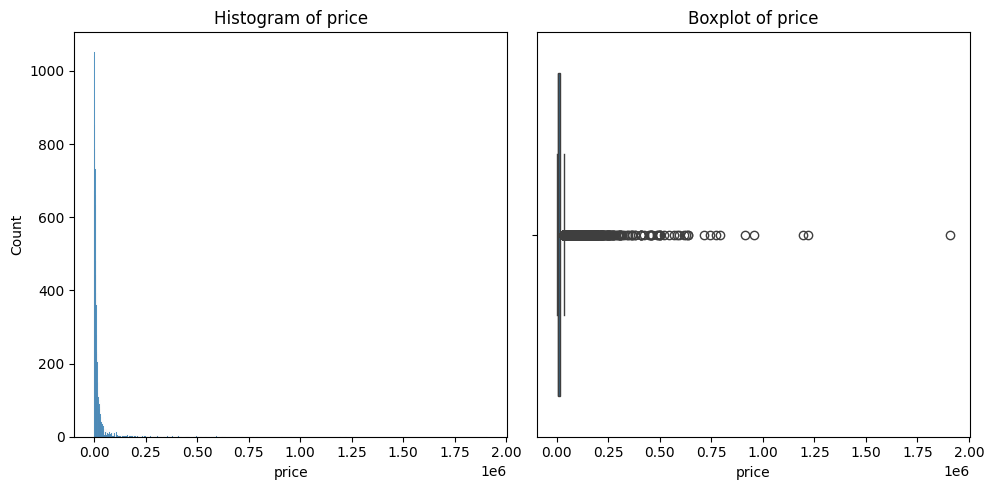

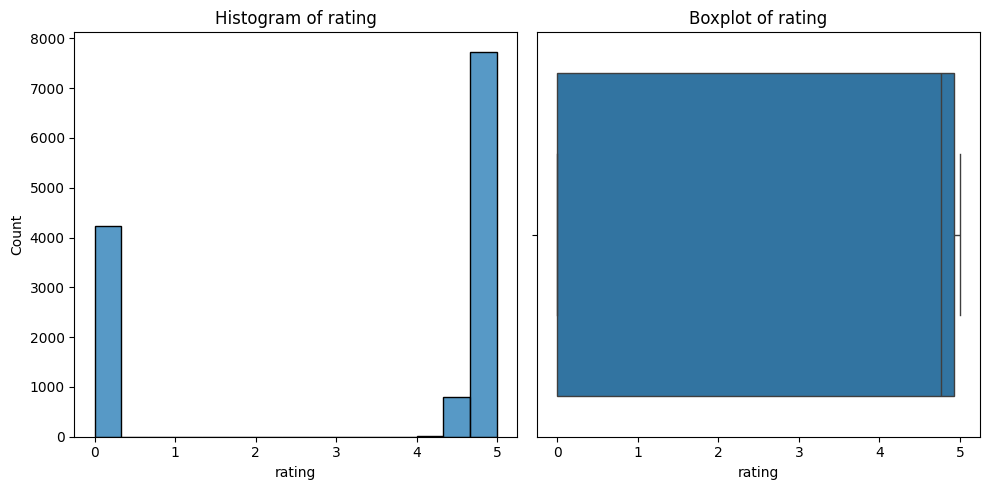

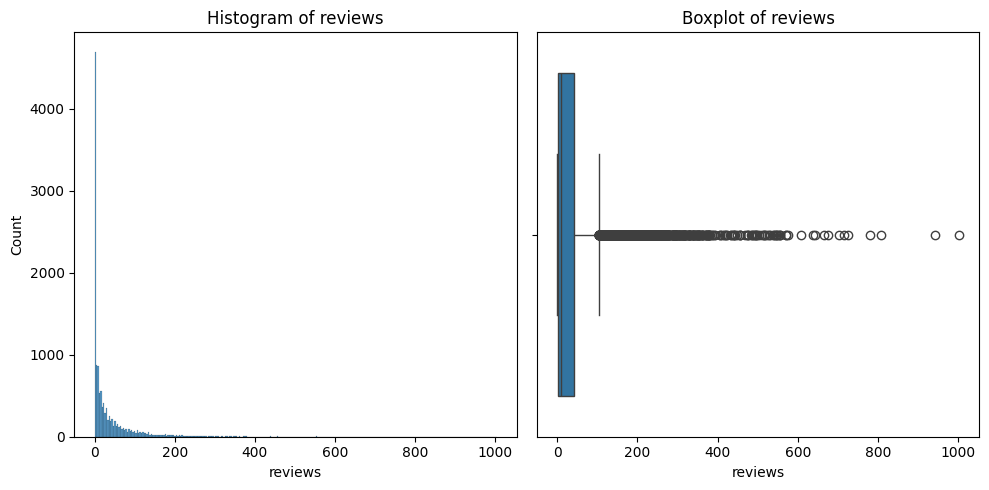

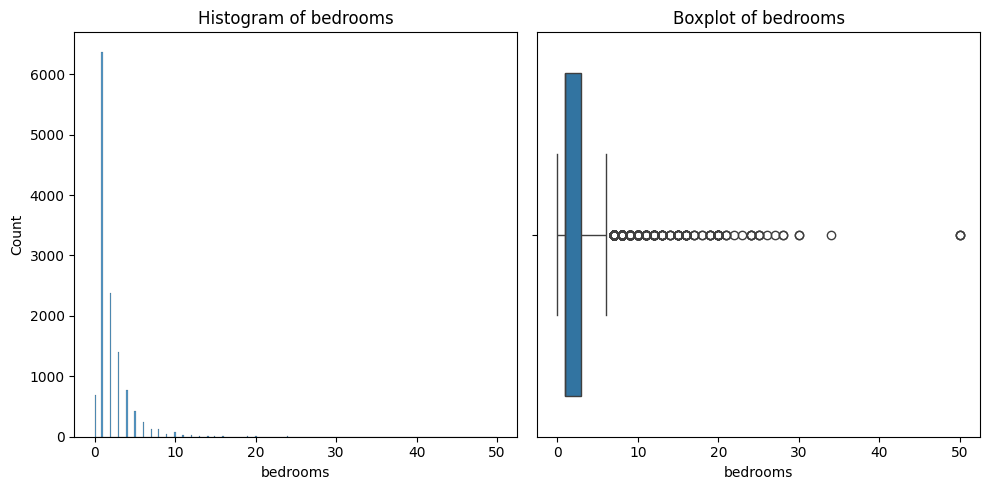

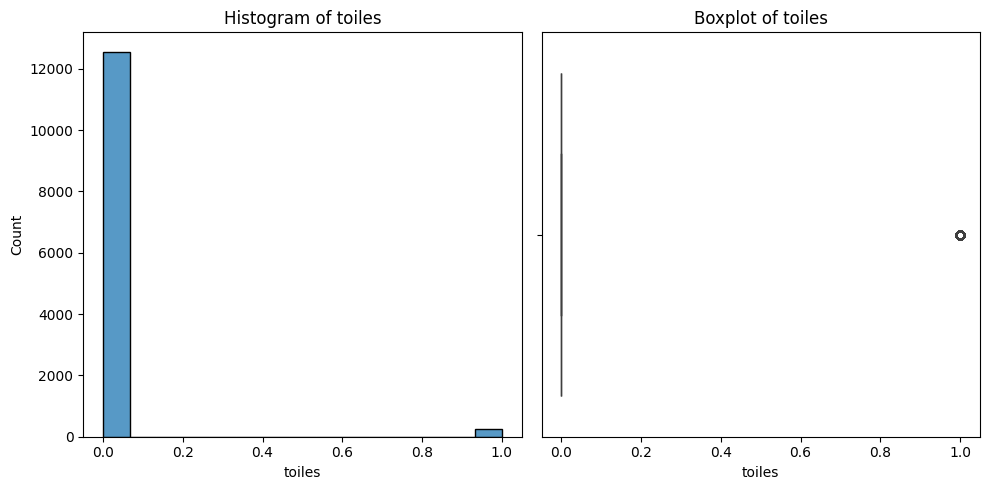

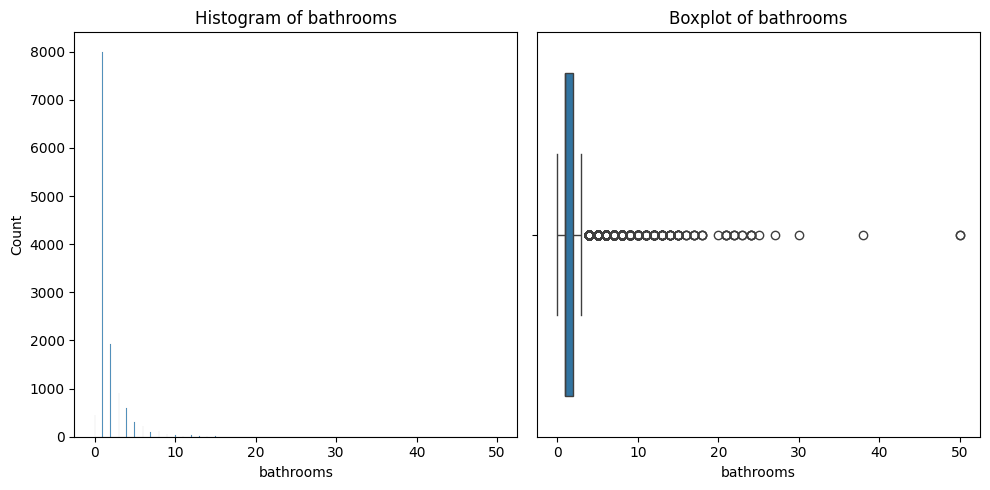

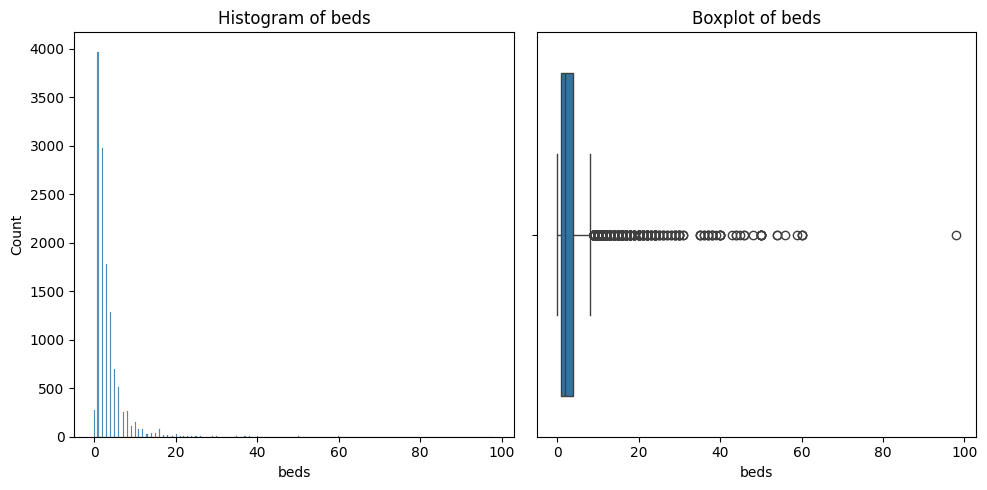

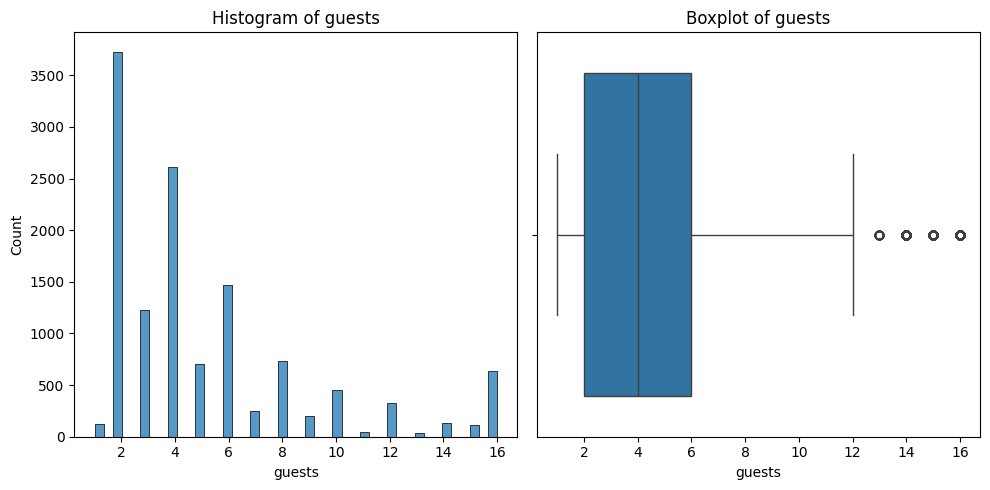

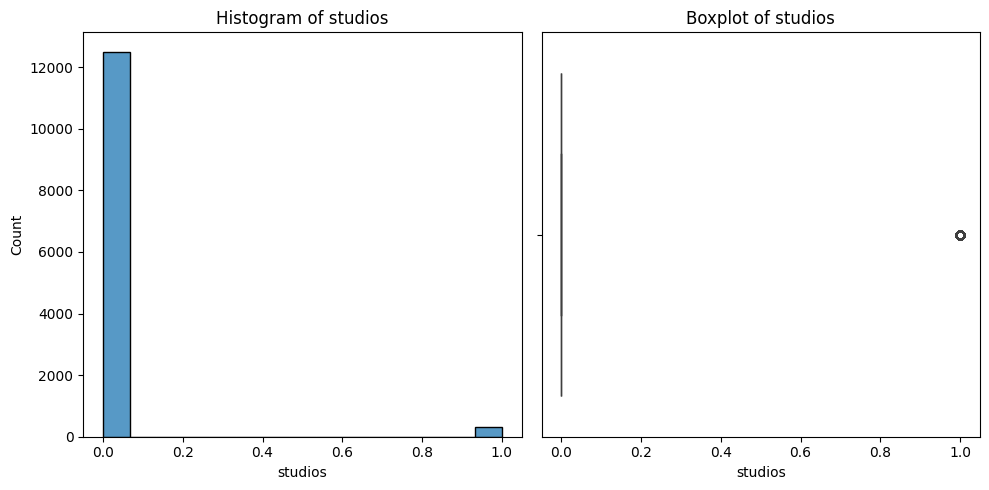

In [480]:
# histograms and boxplot

for col in cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

**No need to take studios and toiles**

## Outlier Detection and Removal

In [481]:
print("Original shape:", df.shape)

target_cols = ['price', 'rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests']

Q1 = df[target_cols].quantile(0.25)
Q3 = df[target_cols].quantile(0.75)
IQR = Q3 - Q1

mask = ~((df[target_cols] < (Q1 - 1.5 * IQR)) | (df[target_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[mask]

print("New shape after outlier removal:", df.shape)


Original shape: (12805, 23)
New shape after outlier removal: (9182, 23)


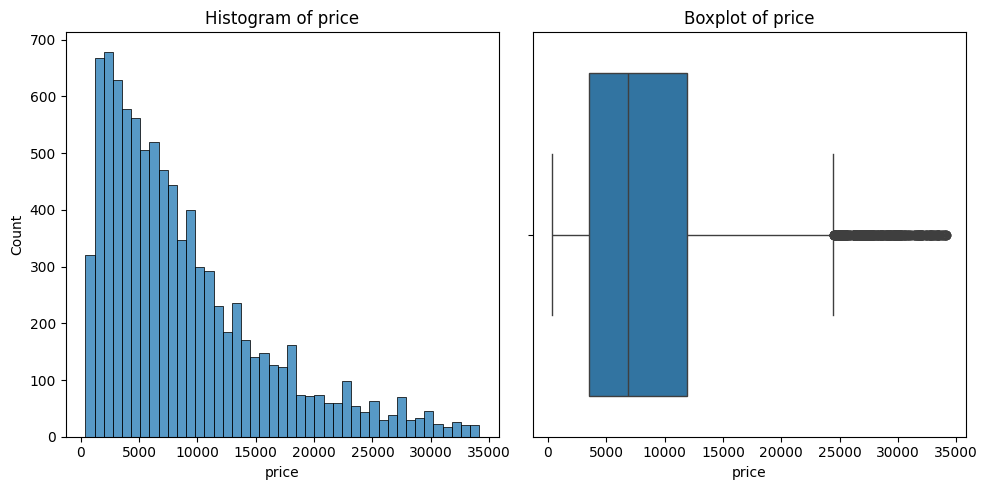

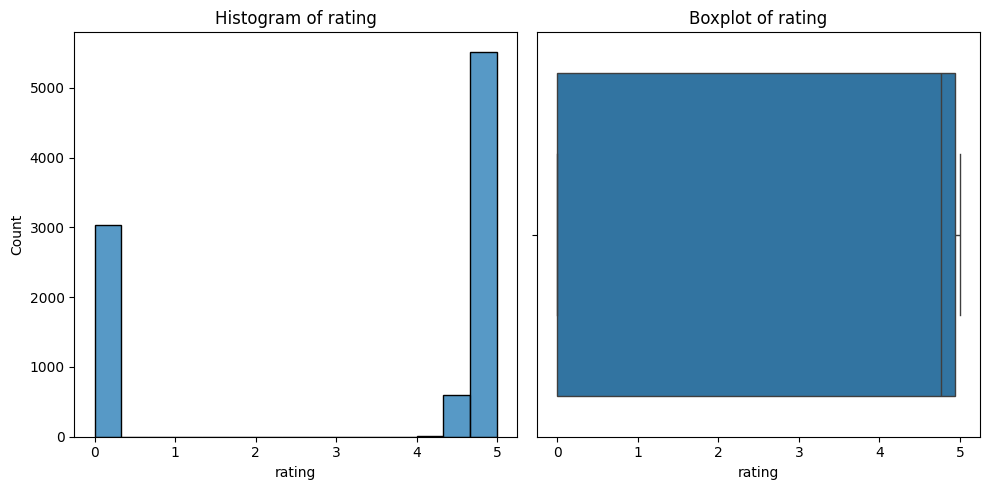

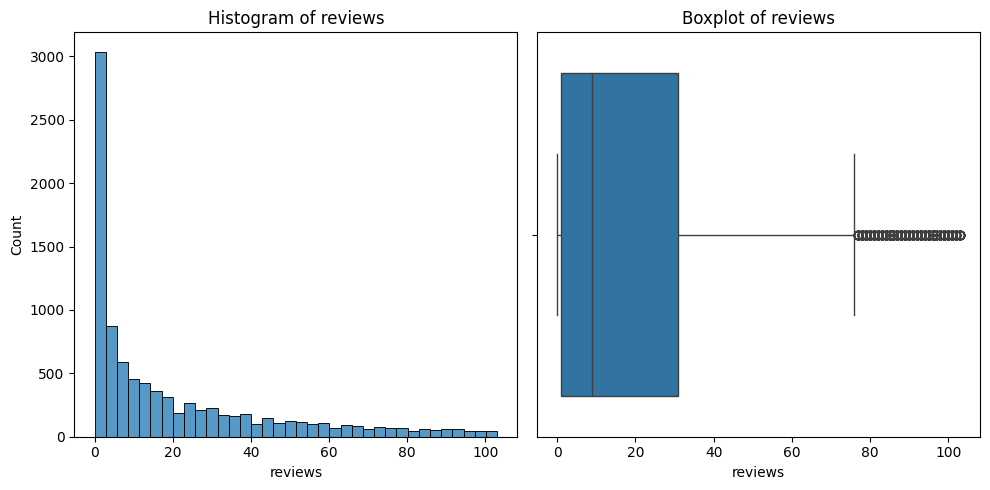

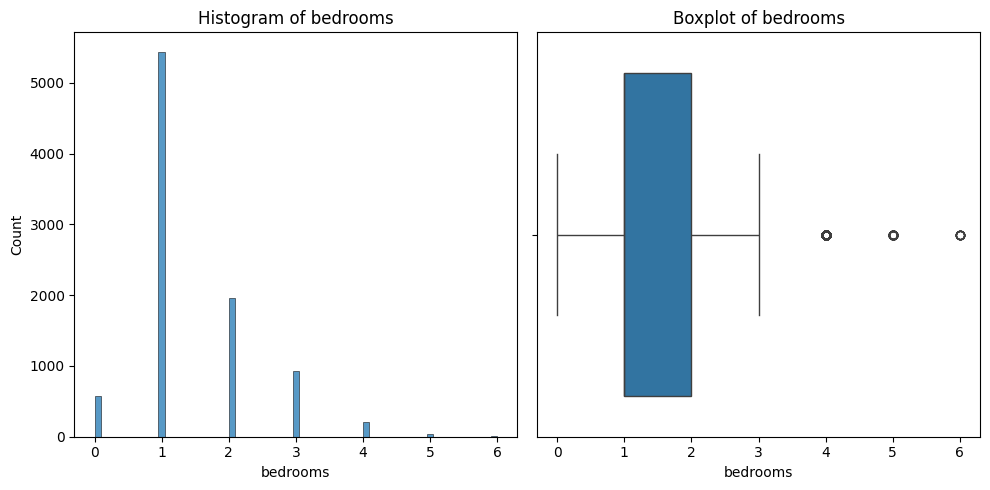

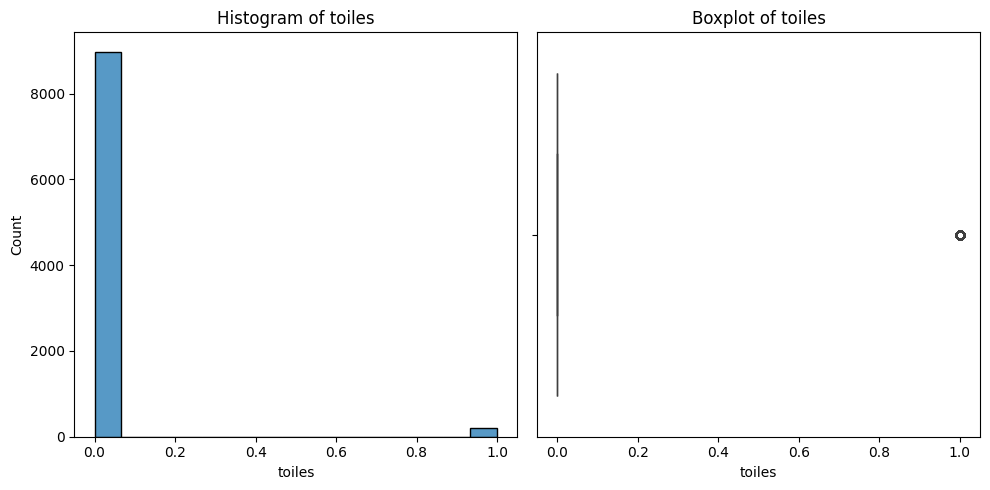

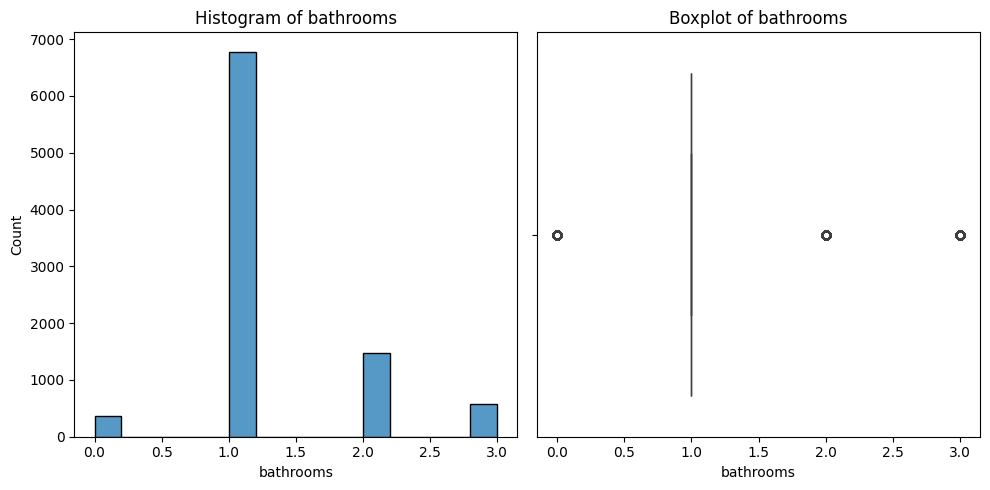

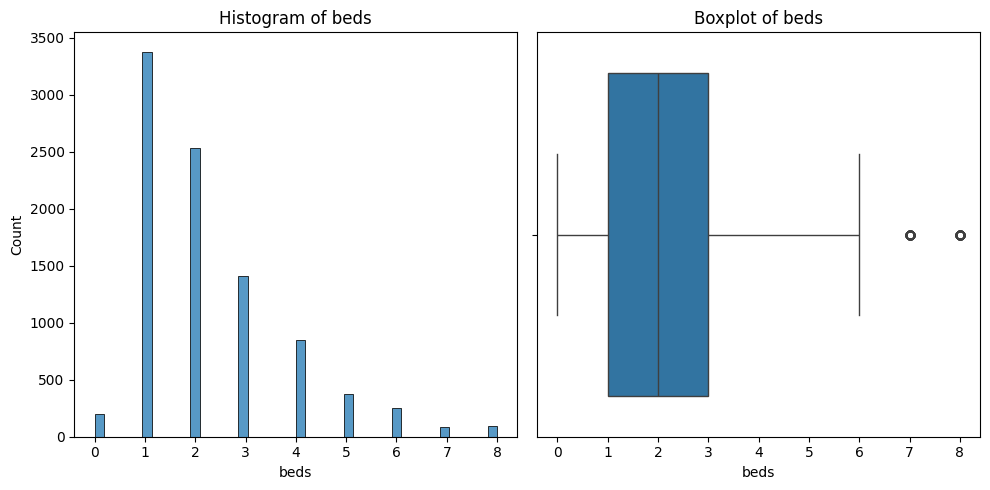

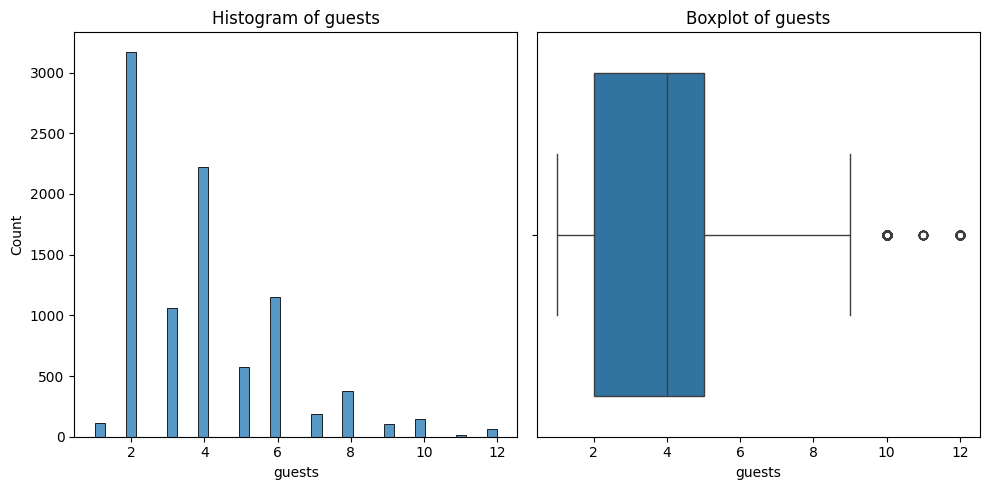

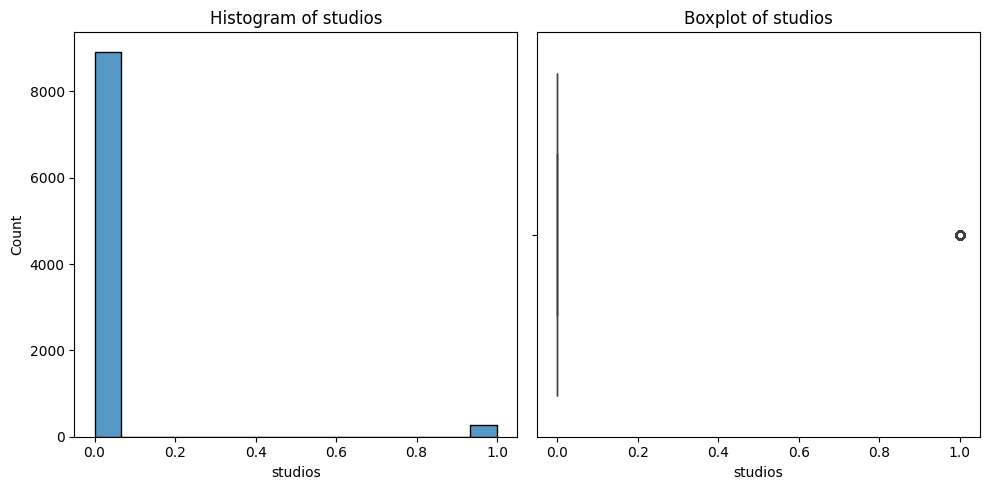

In [482]:
# histograms and boxplot

for col in cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

## Correlation Analysis

In [483]:
corr_matrix = df[cols].corr()
corr_matrix

,price,rating,reviews,bedrooms,toiles,bathrooms,beds,guests,studios
price,1.000000,0.014478,0.020832,0.347516,-0.019719,0.254591,0.286046,0.340647,-0.074282
rating,0.014478,1.000000,0.542230,0.049573,0.033536,-0.006912,0.067905,0.050049,0.021144
reviews,0.020832,0.542230,1.000000,0.015409,0.030953,-0.038316,0.038969,0.030848,0.017163
bedrooms,0.347516,0.049573,0.015409,1.000000,-0.083483,0.597945,0.601027,0.687057,-0.279453
toiles,-0.019719,0.033536,0.030953,-0.083483,1.000000,-0.298321,-0.025136,-0.055348,-0.003167
bathrooms,0.254591,-0.006912,-0.038316,0.597945,-0.298321,1.000000,0.370614,0.514563,-0.072568
beds,0.286046,0.067905,0.038969,0.601027,-0.025136,0.370614,1.000000,0.695163,-0.056724
guests,0.340647,0.050049,0.030848,0.687057,-0.055348,0.514563,0.695163,1.000000,-0.060871
studios,-0.074282,0.021144,0.017163,-0.279453,-0.003167,-0.072568,-0.056724,-0.060871,1.000000


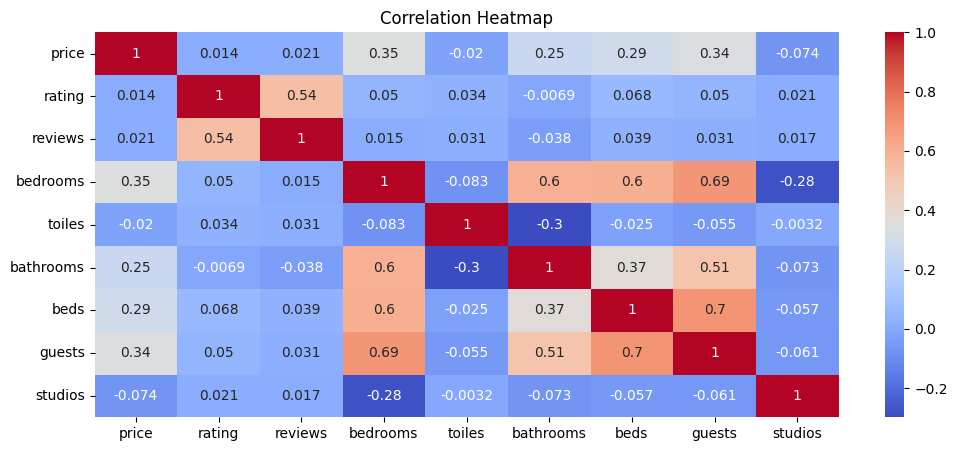

In [484]:
plt.figure(figsize=(12, 5))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Analyze categorical features

In [485]:
cols = ['country', 'host_name', 'bedrooms']
df['country'].value_counts()

,count
country,
India,2162
Italy,860
Greece,590
Thailand,472
Turkey,358
...,...
Kosovo,1
Jamaica,1
Senegal,1


In [486]:
df['host_name'].value_counts()

,count
host_name,
Onda,57
Maria,40
David,28
Shanu,28
Giuseppe,24
...,...
Jillian,1
The Kharma Villas,1
Ole Harald,1


In [487]:
df['bedrooms'].value_counts()

,count
bedrooms,
1,5440
2,1965
3,935
0,580
4,214
5,40
6,8


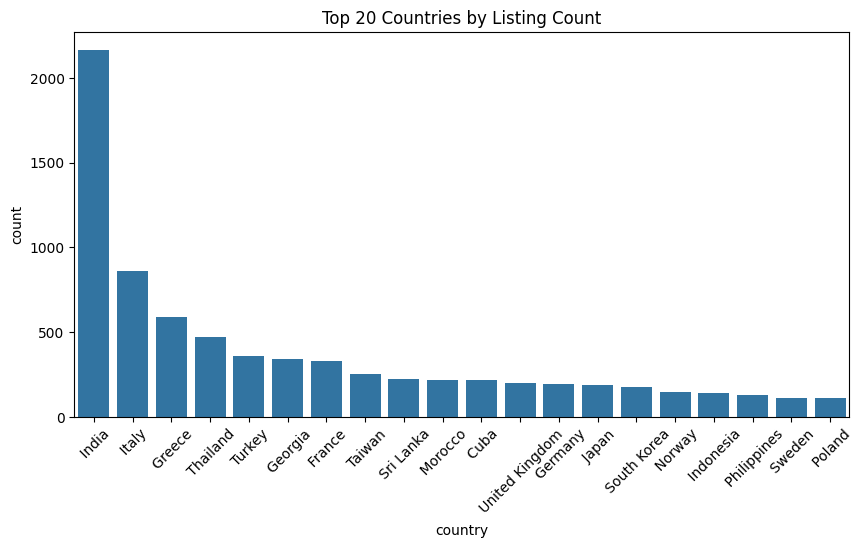

In [488]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='country', order=df['country'].value_counts().head(20).index)
plt.title('Top 20 Countries by Listing Count')
plt.xticks(rotation=45)
plt.show()

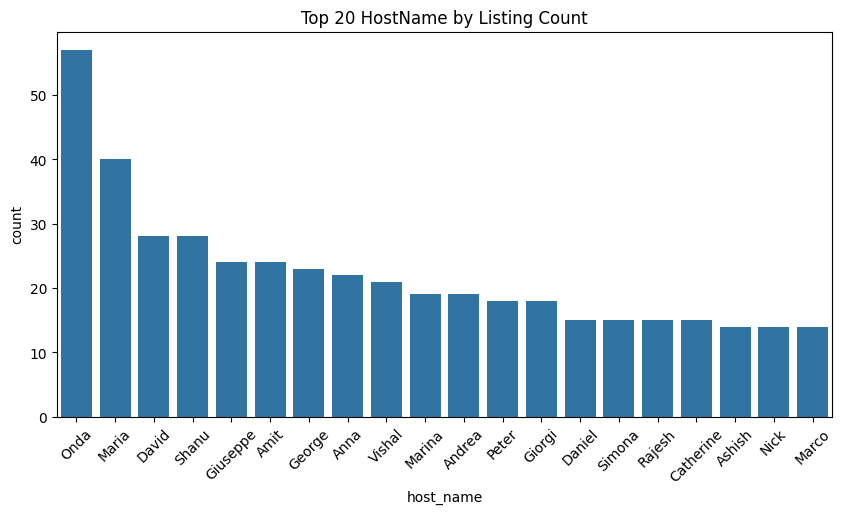

In [489]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='host_name', order=df['host_name'].value_counts().head(20).index)
plt.title('Top 20 HostName by Listing Count')
plt.xticks(rotation=45)
plt.show()

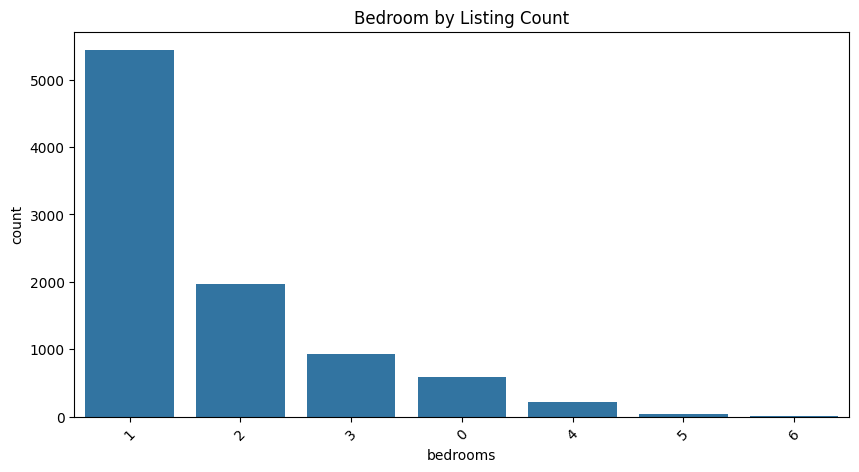

In [490]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='bedrooms', order=df['bedrooms'].value_counts().index)
plt.title('Bedroom by Listing Count')
plt.xticks(rotation=45)
plt.show()

# Data Cleaning

## Find out the Missing Values

In [491]:
print("------------Missing Values-----------")
for key, value in df.isna().sum().items():
    if value != 0:
        print(key, " = ", value)

------------Missing Values-----------
host_name  =  7
checkin  =  587
checkout  =  1884


Drop null values of host_name column. Because they are few only 7

In [492]:
df = df.dropna(subset=['host_name'])

Fill null value to unknown in checkin and checkout column

In [493]:
df['checkin'] = df['checkin'].fillna('unknown')
df['checkout'] = df['checkout'].fillna('unknown')

<ipython-input-493-951be6b79465>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checkin'] = df['checkin'].fillna('unknown')
<ipython-input-493-951be6b79465>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checkout'] = df['checkout'].fillna('unknown')


In [494]:
df.shape

(9175, 23)

In [495]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,0
host_id,0
address,0
features,0
amenities,0


## Convert Categorical Feature

In [496]:
label_encoder = LabelEncoder()
df['country_encode'] = label_encoder.fit_transform(df['country'])

<ipython-input-496-2da2c56e3a24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_encode'] = label_encoder.fit_transform(df['country'])


In [497]:
label_encoder.inverse_transform([0, 29, 90])

array([' Albania', ' France', ' South Korea'], dtype=object)

In [498]:
df.sample(5)

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,country_encode
7589,7589,26463409,Yog Amritam,4.86,22,Shailendra,192839192.0,"Rishikesh, Uttarakhand, India","2 guests,1 bedroom,2 beds,1.5 shared bathrooms","Mountain view,Valley view,Wifi,Washing machine...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 8:00 am - 12:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/8eeb0a89-8...,822,India,1,2,2,0,1,0,8 00 am - 12 00 pm,10 00 am,40
2105,2105,581552903982310101,Stunning Cotswold Shepherd Hut Views TV WiFi,4.96,24,Kate,13092400.0,"Winchcombe, England, United Kingdom","2 guests,1 bedroom,1 bed,1 bathroom","Garden view,Mountain view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,Car...","Check-in: 3:00 pm - 10:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/e817c5f3-6...,9851,United Kingdom,1,1,2,0,1,0,3 00 pm - 10 00 pm,10 00 am,105
6157,6157,16196099,"Private room in bungalow, near Central Market, LN",4.78,9,Kanta,105775510.0,"New Delhi, Delhi, India","2 guests,1 bedroom,1 bed,1 private bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 12:00 pm,Check out: 10:00 am,N...",https://a0.muscache.com/im/pictures/1c2567cd-2...,2271,India,1,1,2,0,1,0,After 12 00 pm,10 00 am,40
171,171,575691198880313867,Omah Blarak - Barn C,0.00,0,Bambang,447719925.0,"Kecamatan Bantul, Daerah Istimewa Yogyakarta, ...","2 guests,1 bedroom,2 beds,1 private bathroom","Courtyard view,Garden view,Kitchen,Wifi,Dedica...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 3:00 pm,Check out: 11:00 am,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,1533,Indonesia,1,2,2,0,1,0,After 3 00 pm,11 00 am,41
4538,4538,2610384,SailingBoatRomanticViewRelaxingCozy,4.86,37,Turner,13368778.0,"Adalar, Istanbul, Turkey","8 guests,3 bedrooms,3 beds,1 bathroom","Beach access – Beachfront,Kitchen,Wifi,Patio o...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 10:00 am,Check out: 8:00 am,No...",https://a0.muscache.com/im/pictures/9f45b524-8...,29789,Turkey,1,3,8,0,3,0,After 10 00 am,8 00 am,101


## Feature Scaling

In [499]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['reviews'] =  std_scaler.fit_transform(df[['reviews']])

In [500]:
df.sample(2)

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,country_encode
5716,5716,42543255,House Hardy (14931-K1),0.00,-0.802513,Adriagate,334005755.0,"Tkon - island Pasman, HR, Croatia","6 guests,3 bedrooms,3 beds,1 bathroom","Kitchen,Pets allowed,Smoking allowed,Long-term...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 1:00 pm - 10:00 pm,Check out: 9:00 a...",https://a0.muscache.com/im/pictures/prohost-ap...,7383,Croatia,1,3,6,0,3,0,1 00 pm - 10 00 pm,9 00 am,20
4878,4878,558520549549171246,Mattress for campers in a yurt,4.88,-0.128055,Sandrine,9494986.0,"Gourdon, Provence-Alpes-Côte d'Azur, France","5 guests,1 bedroom,5 beds,Shared toilet with sink","Free parking on premises,Shared backyard – Not...",Not Available,Not Available,https://a0.muscache.com/im/pictures/miso/Hosti...,2362,France,0,5,5,1,1,0,unknown,unknown,29


# Remove Unnecessary Columns

In [501]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout',
       'country_encode'],
      dtype='object')

In [502]:
excluded_columns = ['Unnamed: 0', 'id', 'name', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'checkin', 'checkout', 'country', 'price', 'studios', 'toiles', 'country_encode']

y = df['price']
X = df.drop(excluded_columns, axis=1)

In [503]:
X.columns

Index(['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'bedrooms'], dtype='object')

In [504]:
X.head()

,rating,reviews,bathrooms,beds,guests,bedrooms
0,4.71,1.736622,1,1,2,2
1,0.00,-0.802513,2,2,4,2
2,4.85,1.895318,1,3,4,1
3,5.00,-0.286751,1,2,4,1
4,0.00,-0.802513,1,1,2,1


In [505]:
X.shape

(9175, 6)

# Spit the dataset

In [506]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [507]:
print(f"Train size : {X_train.shape}")
print(f"Validation size : {X_val.shape}")
print(f"Test size : {X_test.shape}")

Train size : (6422, 6)
Validation size : (1376, 6)
Test size : (1377, 6)


# Model Creation - ANN

In [508]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

BATCH_SIZE = 32
EPOCHS = 100

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [509]:
model.compile(optimizer='adam', loss='huber', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8197.0586 - mae: 8197.5586 - val_loss: 5040.9316 - val_mae: 5041.4316
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4971.8267 - mae: 4972.3267 - val_loss: 5027.6895 - val_mae: 5028.1895
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4825.2632 - mae: 4825.7632 - val_loss: 5003.7700 - val_mae: 5004.2700
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5008.3091 - mae: 5008.8091 - val_loss: 4994.1250 - val_mae: 4994.6250
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4753.7700 - mae: 4754.2700 - val_loss: 5013.2456 - val_mae: 5013.7456
Epoch 6/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4839.3706 - mae: 4839.8706 - val_loss: 4987.4810 - val_mae: 4987.9810
Epoch 7/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4859.2534 - mae: 4859.7534 - val_loss: 4991.3530 - val_mae: 4991.8521
Epoch 8/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4815.8667 - mae: 4816.

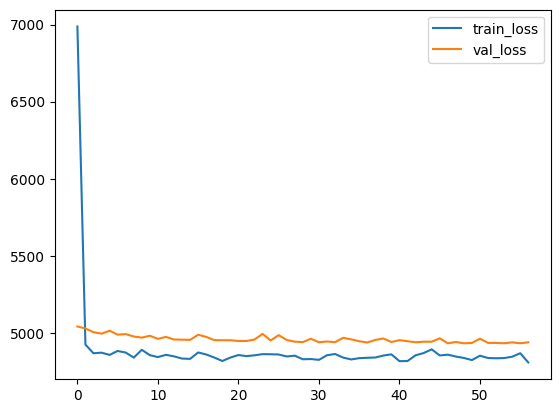

In [510]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [511]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4764.4497 - mae: 4764.9497
Test Loss: 4931.45068359375, Test Accuracy: 4931.95068359375


In [512]:
print("Difference between actual and predicted prices")
model.predict(X_test)[:10].flatten() - np.array(y_test[:10])

Difference between actual and predicted prices
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([  2027.17089844,   9170.98730469, -14212.42089844,   4801.76464844,
         2184.78027344,  -6227.91992188,  -1364.21435547,   -761.62011719,
          496.84033203,   3106.31689453])

# Ensemble Model

In [513]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [514]:
preds = rf.predict(X_test)

In [515]:
print("Difference between actual and predicted prices")
preds[:10] - np.array(y_test[:10])

Difference between actual and predicted prices


array([   553.66      ,  11838.38      , -11311.76103175,   5813.705     ,
         3104.3302779 ,  -1754.36666667,    627.02983333,  -1282.22185015,
         1279.42813781,   6743.83957186])

# Gradient Boosting

In [516]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [517]:
preds = gb.predict(X_test)

In [518]:
print("Difference between actual and predicted prices")
preds[:10] - np.array(y_pred[10])

Difference between actual and predicted prices


array([5469.5486946 , 7369.75537392, 2872.3095616 , 3864.65437834,
       1317.22524198, 4721.1299377 , 1116.25299442, 1959.37630398,
        -23.47653392, 1317.22524198])